In [71]:
%matplotlib inline
# or notebook for interactive?
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
from PIL import Image
    
# Weight matrix function
def basic_weight(img, a, b):
    """
    img = source image
    a = coordinate 1 (x,y)
    b = coordinate 2 (i,j)
    
    returns gaussian difference of (x,y) and (i,j)
    """
    s_i = 1 # sigma variable for intensity
    s_s = 6 # sigma variable for spatial
    intensity = np.linalg.norm()
    intensity = np.exp(-1 * intensity / s_i)
    

def create_weights(img):
    """
    Convert the image into a weighted adjacency matrix (4 way, spatial + intensity weights)
    based on the original 2000 paper
    """
    x,y = img.size
    N = x*y # number of verticies
    
    W = np.zeros((N,N)) # weights matrix (essentially a weighted adjacency graph)
    
#     connection = 4 # 4-way connected graph (so only calculate the 4 neighbours, instead of full graph)
    
    
#     for i in range(x):
#         for j in range(y):
#             # i,j = the current pixel to compare other pixels against
#             for i1 in range(-connection/2 + i, connection/2 + i):
#                 for j2 in range(-connection/2 + j, connection/2 + j):
#                     # i1,j2 = the neighbouring pixels
#                     if (0 <= i1 < x) and (0 <= j1 < y):
                        
#                     else:
#                         W[i1][j1] = 0
                    
    r = 1
    s_i = 1
    s_s = 6
    counter = 0
    for i1 in range(x):
        for j1 in range(y):
            list = []
            for i2 in range(x):
                for j2 in range(y):
                    if ( (abs(i1-i2)+abs(j1-j2))< r  ): #1st norm
                        intens = np.linalg.norm( [ img.getpixel((i1,j1)),img.getpixel((i2,j2)) ] , 2 )
                        spat =  np.linalg.norm( [  (i1-i2), (j1-j2) ] , 2)
                        intens = np.exp(-1*intens/s_i)
                        spat = np.exp(-1*spat/s_s)
                        w = intens*spat
                    else:
                        w=0
                    list.append(w)
            W[counter,:] = list
            counter += 1

    return W

def segment_image(img, eigvec):
    """
    Convert the eigenvector into a mask, to apply to the image to segment it
    """
    x,y = img.size
    print((x,y))
    print(eigvec)
    print(torch.sign(eigvec))
    mask = torch.sign(eigvec)
    for c,i in enumerate(eigvec):
        prev = eigvec[c]
        if (i>0.0001):
            mask[c] = 0
    mask2 = np.reshape( mask , (x,y) )
    new_img = np.multiply( img ,mask2  ) # element wise mulitplication
    return np.asarray(new_img)
    
    
def solve(W):
    """
    Calculate the second smallest eigenvector from the laplacian
    """
    W = torch.from_numpy(np.asarray(W))
    D = W.sum(0).diag() # D is an NxN diagonal matrix with d on diagonal, for d(i) = sum_j(w(i,j))
    ONE = torch.ones(W.size(dim=0),1)   # Nx1 vector of all ones
    L = D - W

    val, vec = torch.linalg.eigh(L)
    seen = {}
    uniques = []
    for (x,y) in zip(val, vec):
        if x in seen:
            continue
        seen[x] = 1
        uniques.append((x,y))
    fiedler = sorted(uniques)[1][1]
    return fiedler #, _ for the actual solve function...

0.0


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

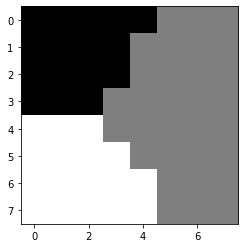

In [72]:
image = Image.open('./data/clean.png').convert('L')
plt.imshow(image, cmap='gray')

print(np.linalg.norm( [ image.getpixel((0,0)),image.getpixel((0,2)) ] , 2 ))


seg_image = segment_image(image, solve(create_weights(image)))
plt.imshow(seg_image)